In [1]:
#Problématique : qu'est ce qui influ sur l'imc des pays d'europe

import plotly.express as px
import pycountry
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd
import warnings
from collections import Counter
warnings.filterwarnings("ignore")


In [25]:
data = pd.read_csv("./tripadvisor_european_restaurants.csv")
print(data[['country', 'city', 'top_tags', 'cuisines']])


         country                      city                           top_tags  \
0         France             Saint-Jouvent                 Cheap Eats, French   
1         France             Saint-Jouvent                         Cheap Eats   
2         France                Rivarennes       Cheap Eats, French, European   
3         France                   Lacelle                 Cheap Eats, French   
4         France  Saint-Laurent-de-Levezou                  Mid-range, French   
...          ...                       ...                                ...   
1083392  Romania                       NaN                                NaN   
1083393  Romania                     Apata        Mid-range, Eastern European   
1083394  Romania                     Sacel                                NaN   
1083395  Romania                       NaN  Cheap Eats, French, American, Bar   
1083396  Romania                   Budesti                              Diner   

                           

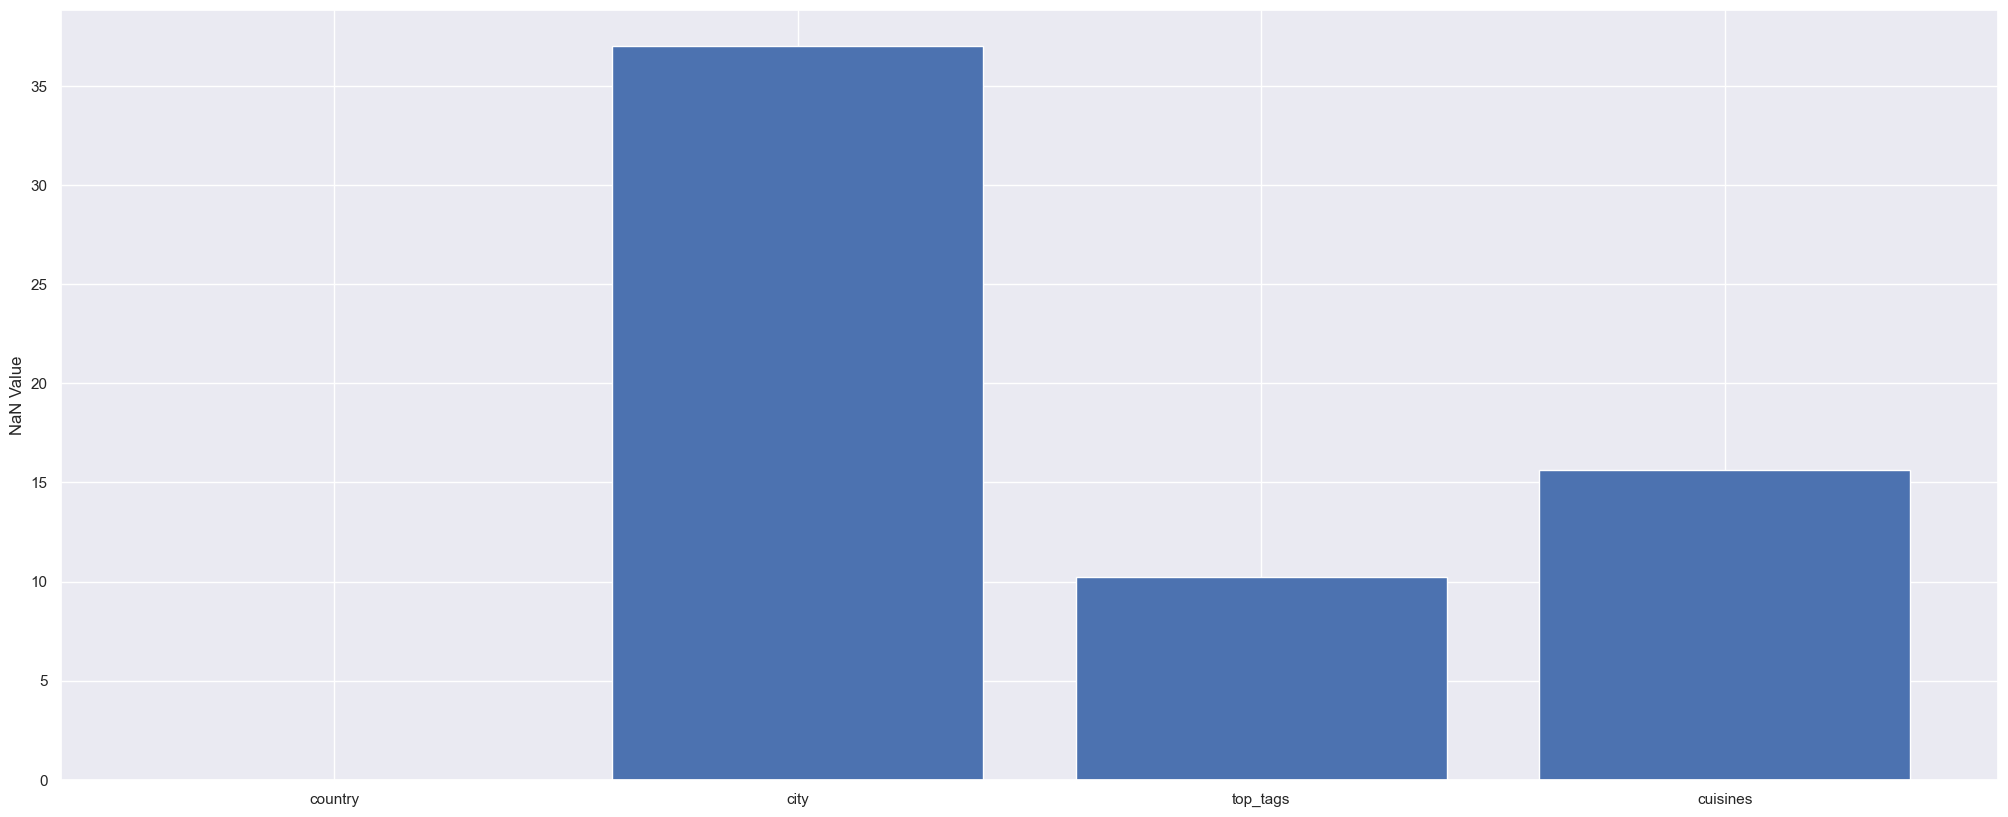

In [26]:
data_restaurants = data[['country', 'city', 'top_tags', 'cuisines']]
df1 = data_restaurants.isnull().sum() * 100 / len(data_restaurants)
graph = plt.bar(['country', 'city', 'top_tags', 'cuisines'], df1)
plt.ylabel('NaN Value')
plt.show()


In [27]:
df = data_restaurants
df.dropna(subset=['top_tags'], inplace=True)
df1 = df.loc[df['top_tags'].str.contains('Fast food')]
df1['country'] = df1['country'].replace(
    ['England', 'Scotland', 'Wales', 'Northern Ireland'], 'United Kingdom')
df1['country'] = df1['country'].replace(['The Netherlands'], 'Netherlands')
df1['country'] = df1['country'].replace(['Czech Republic'], 'Czechia')
df1['country'].value_counts()


United Kingdom    21833
France             8654
Italy              7215
Spain              5829
Germany            4217
Greece             1574
Netherlands        1081
Belgium             965
Portugal            913
Ireland             888
Poland              842
Sweden              756
Czechia             660
Austria             484
Denmark             473
Finland             465
Croatia             436
Hungary             428
Romania             386
Bulgaria            196
Slovakia            184
Name: country, dtype: int64

In [28]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in df1['country']]
df2 = df1.assign(code=codes)
df2['occurence'] = df2['country'].map(df2['country'].value_counts())
df2


,country,city,top_tags,cuisines,code,occurence
11,France,Rocbaron,"Cheap Eats, French, Fast food","French, Fast food",FRA,8654
68,France,Espaly-Saint-Marcel,"Mid-range, Pizza, Fast food","Pizza, Fast food",FRA,8654
101,France,Conflans Sainte Honorine,"French, Fast food, Street Food","French, Fast food, Street Food",FRA,8654
126,France,Conflans Sainte Honorine,"Cheap Eats, Fast food",Fast food,FRA,8654
135,France,Conflans Sainte Honorine,"Cheap Eats, Fast food, Turkish","Turkish, Fast food",FRA,8654
...,...,...,...,...,...,...
1083279,Romania,NaN,"Cheap Eats, Italian, Fast food, European","Italian, Fast food, European, Romanian",ROU,386
1083289,Romania,NaN,"Mid-range, Pizza, Fast food, European","Pizza, Fast food, European, Pub, Gastropub, Ro...",ROU,386
1083294,Romania,Beclean,"Pizza, Fast food, European, Romanian","Pizza, Fast food, European, Romanian",ROU,386
1083379,Romania,Rasnov,"Cheap Eats, Fast food",Fast food,ROU,386


In [29]:

fig = px.choropleth(df2, scope='europe', locationmode='ISO-3',
                    locations=df2['code'], color=df2['occurence'])
#fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))
fig.update_layout(
    autosize=False,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
        pad=4,
        autoexpand=True
    ),
    width=800,
    # height=400,
)
fig.show()


In [94]:
europe = ["United Kingdom", 'France', 'Spain', 'Germany', 'Greece', 'Netherlands', 'Belgium', 'Portugal', 'Ireland',
          'Poland', 'Sweden', 'Czechia', 'Austria', 'Denmark', 'Finland', 'Croatia', 'Hungary', 'Romania', 'Bulgaria', 'Slovakia']
df_europe = pd.read_csv(
    './NCD_RisC_Lancet_2017_BMI_age_standardised_country.csv', encoding='latin1')
df_europe_2016 = df_europe.loc[(df_europe['Year'] == 2016) & df_europe['Country/Region/World'].isin(europe)]
df_europe_2016_2 = df_europe_2016[['Country/Region/World', 'Sex', 'Mean BMI']]
df_europe_2016_2.rename(columns= {'Country/Region/World':'Country'}, inplace=True)
#df_europe_2016_2.rename(columns= {'Mean BMI' : 'BMI'}, inplace=True)
df_europe_2016_2


,Country,Sex,Mean BMI
461,Austria,Men,26.672887
755,Belgium,Men,26.801340
1175,Bulgaria,Men,27.322269
1931,Croatia,Men,28.197628
2099,Denmark,Men,26.278623
2645,Finland,Men,26.545815
2687,France,Men,26.072347
2897,Germany,Men,27.484492
2981,Greece,Men,27.656249
3359,Hungary,Men,28.395202


ValueError: Could not interpret input 'Mean BMI'

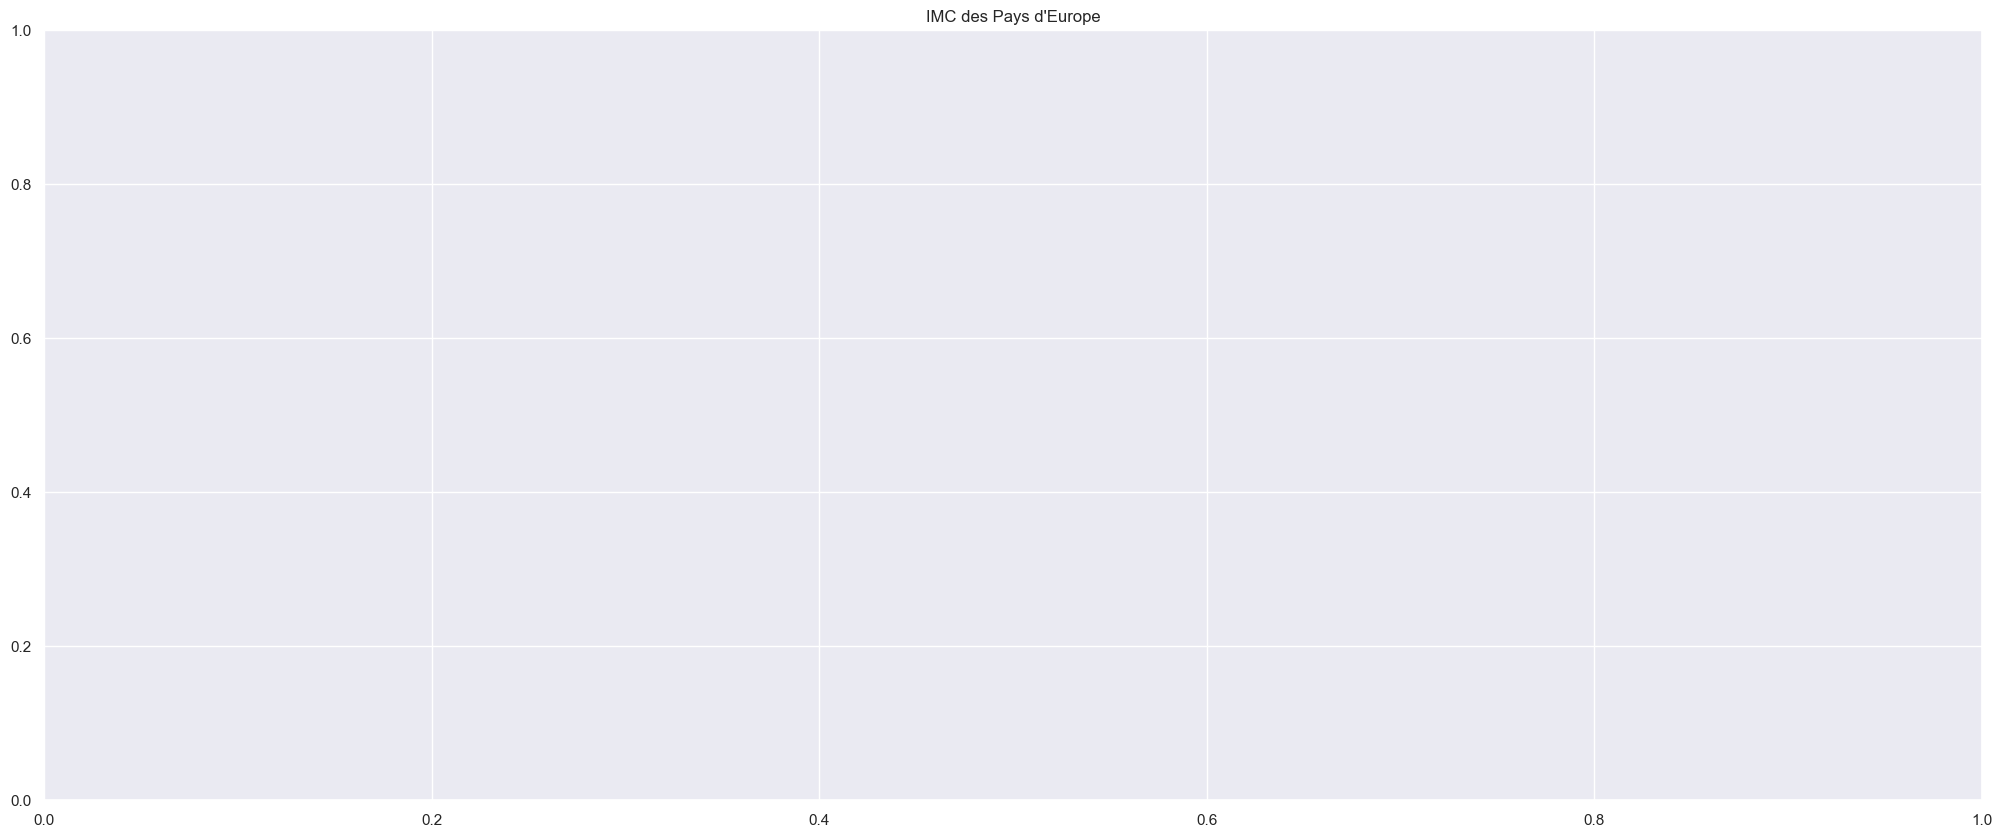

In [31]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25, 10)})
plt.title("IMC des Pays d'Europe")
fig_BMI = sns.barplot(df_europe_2016_2, x='Country', y='Mean BMI', hue='Sex')

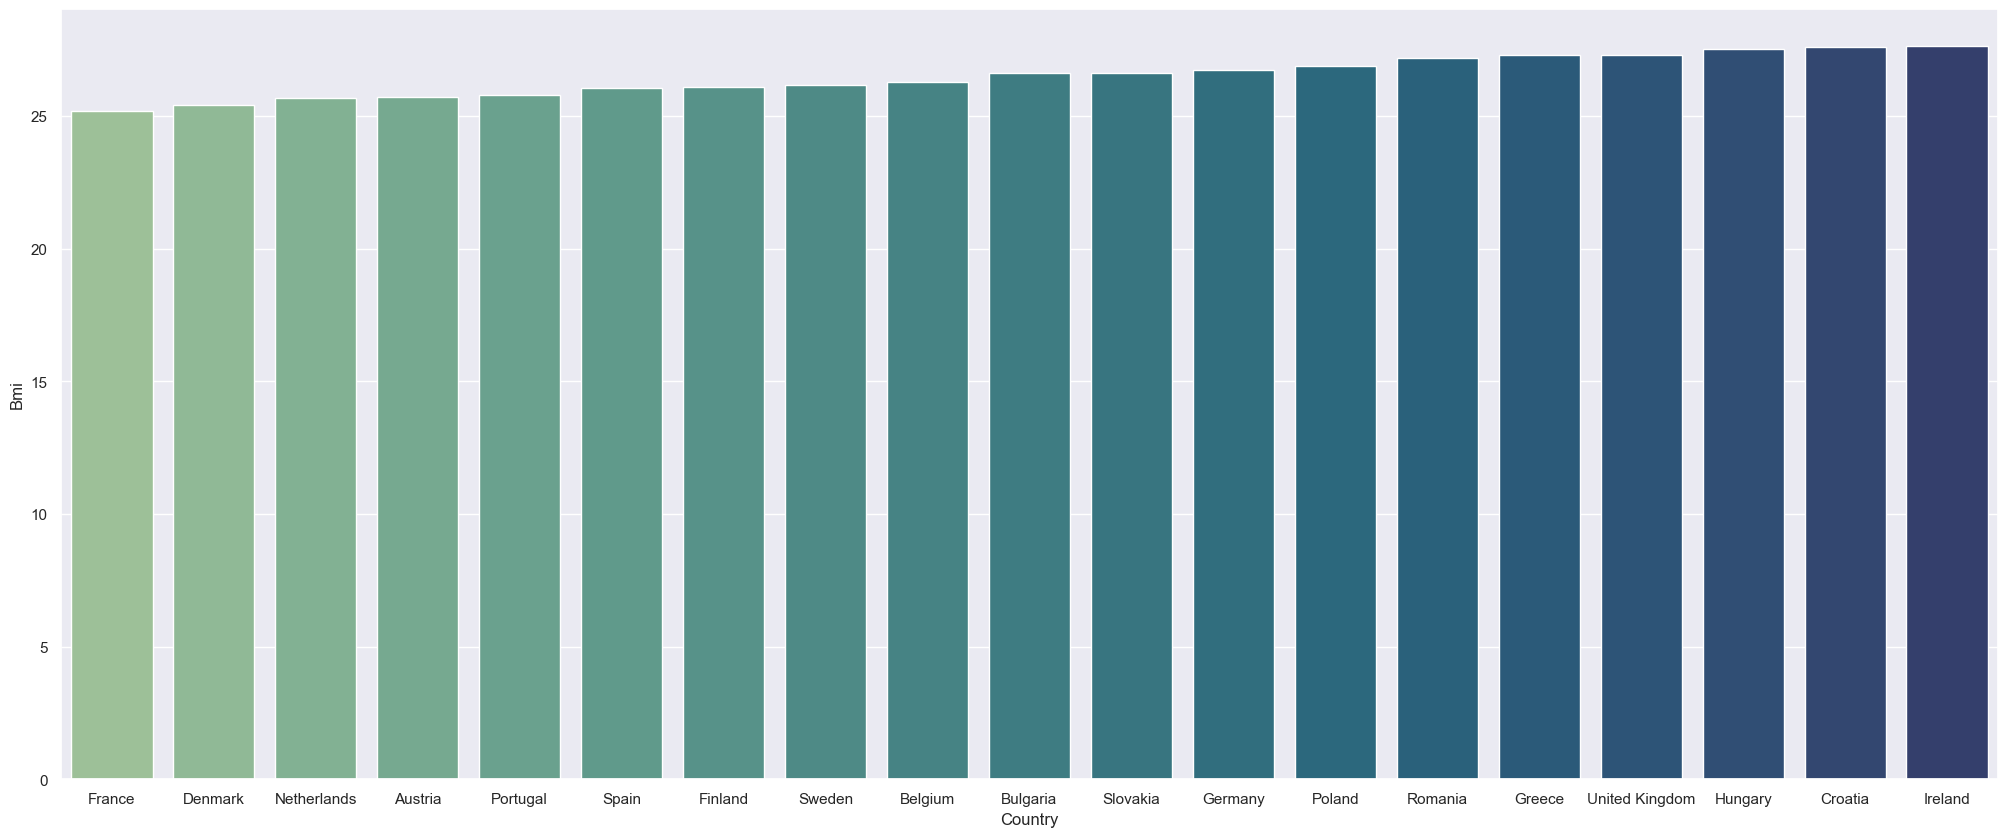

In [ ]:
#faire la moyenne homme/femme IMC
#faire le graph des moyennes en fonctions des pays et les sort par les valeurs
mean_bmi = df_europe_2016_2.groupby('Country')['Mean BMI'].mean()
df_europe_2016_2['Bmi'] = df_europe_2016_2['Country'].map(mean_bmi)
df_europe_2016_3 = df_europe_2016_2.drop(['Sex', 'Mean BMI'], axis=1).drop_duplicates(subset=['Country'])
df_europe_2016_3

fig_BIM = sns.barplot(data=df_europe_2016_3, x='Country' ,y='Bmi', order=df_europe_2016_3.sort_values('Bmi').Country, palette='crest')



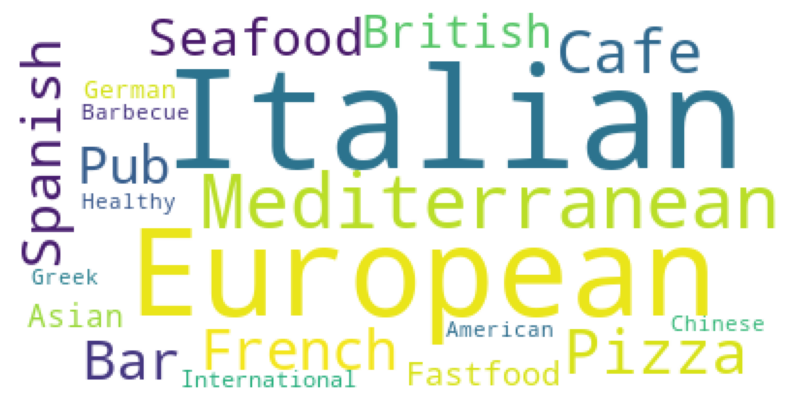

In [51]:
#Word Cloud sur le type de cuisine le plus répandu en Europe
#Faire une étude sur plusieurs pays

df_wc = data[['country', 'cuisines']]

df_wc = df_wc.dropna()
def replace(dataFrame):
    dataFrameRes = list(map(lambda item: item.split(','), dataFrame))
    dataFrameRes = [x for xs in dataFrameRes for x in xs]
    dataFrameRes = [x.strip() for x in dataFrameRes]
    dataFrameRes = [x.replace(' ', '') for x in dataFrameRes]
    return dataFrameRes

df_wc_res = replace(df_wc['cuisines'])
text = ", ".join(df_wc_res)
stopword = set(STOPWORDS)
fig_wc = WordCloud(background_color='white', stopwords=stopword, collocations=False, max_words=20).generate(text)
plt.figure(figsize=(10, 15))
plt.imshow(fig_wc)
plt.axis('off')
plt.show()

[84643, 31729, 16140, 12529, 10897, 9560, 9129, 7745]
['French', 'European', 'Italian', 'Pizza', 'Mediterranean', 'Asian', 'Fastfood', 'Bar']


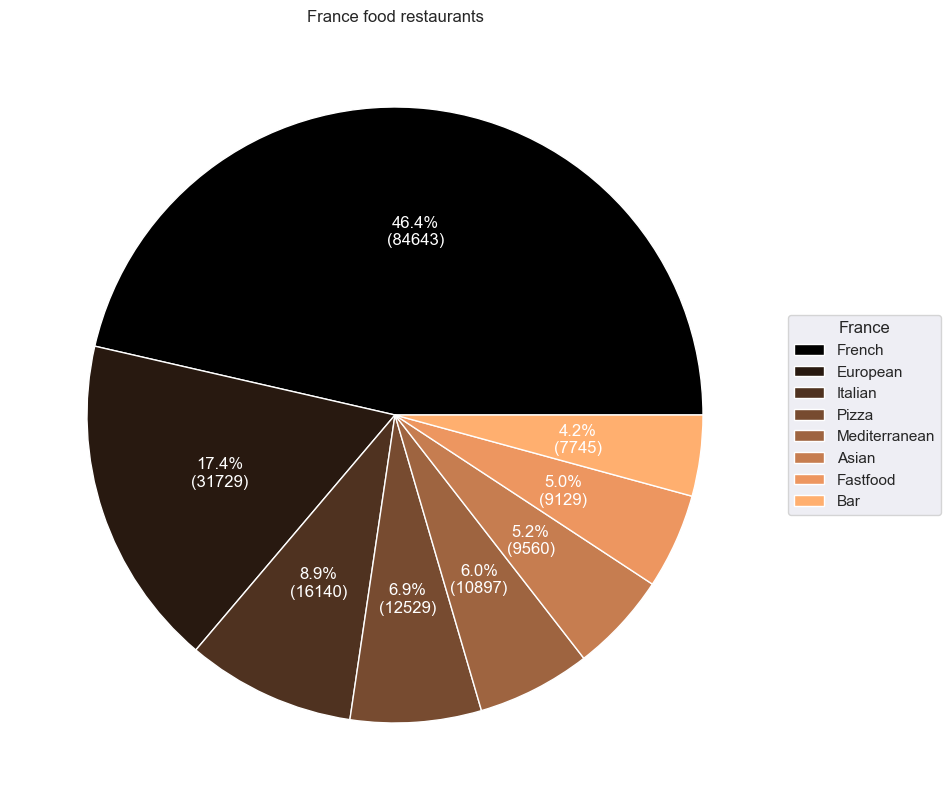

In [99]:
df_france = data[['country', 'cuisines']]
df_france = df_france.dropna()
df_france = df_france.loc[df_france['country'] == 'France']
df_france2 = replace(df_france['cuisines'])
df_france2 = Counter(df_france2)
dict_france = {key: value for key, value in df_france2.items() if value > 7000}

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

c2=list(dict_france.values())
c2= sorted(c2, reverse=True)
print(c2)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
theme = plt.get_cmap('copper')
ax.set_prop_cycle("color", [theme(1. * i / len(c2))
                             for i in range(len(c2))])

wedges, texts, authotexts= ax.pie(c2, autopct=lambda pct: func(pct, c2), textprops=dict(color="w"))

c3= sorted(dict_france, key=dict_france.get, reverse=True)
c3=c3[0:len(dict_france)]
print(c3)


ax.legend(wedges, c3,
          title="France",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("France food restaurants")

plt.show()


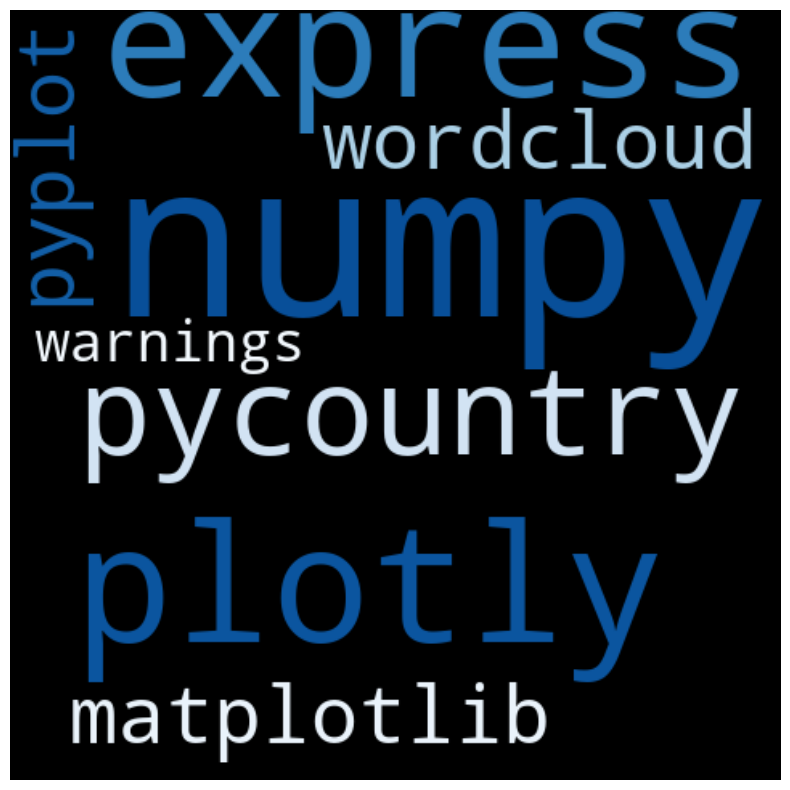

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("plotly.express pycountry matplotlib.pyplot wordcloud numpy warnings numpy")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, colormap="Blues").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()